<a href="https://colab.research.google.com/github/MrsIgnis/IIS/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 35

# **Алгебраический метод обучения радиально-базисной нейронной сети**

1. Выбрать структуру нейронной сети (количество нейронов и их параметры);
 2. Сформировать обучающую выборку;
 3. Алгебраическим методом вычислить весовые коэффициенты радиальных
нейронов;
 4. Построить аппроксимирующую функцию и сравнить с заданной (подстроить на
одном графике).

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

In [45]:
X_min = 0.0
X_max = 1.0
n = 10
p = n
centers = np.linspace(X_min, X_max, n)
sigma = 0.03

In [46]:
def g(x):
    return np.exp(2 * x) * np.sin(5 * x - 1)

def rbf(x, c, sigma):
    return np.exp(-(x - c)**2 / (2 * sigma))

X_train = centers.copy()
d_train = g(X_train)

In [62]:
print(f"Центры (X_train):\n{X_train}\n")
print(f"Требуемые выходы (d_train):\n{d_train}\n")
print(f"Ширина (sigma): {sigma}")

Центры (X_train):
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]

Требуемые выходы (d_train):
[-0.84147098 -0.53695052  0.17293515  1.20441992  2.28614108  2.97289353
  2.74314769  1.18453731 -1.76461494 -5.59205609]

Ширина (sigma): 0.03


**Вычисляем выходы РБ нейронов для обучающих примеров (Матрица F)**

In [63]:
F = np.zeros((p, n))
for j in range(p):
    for i in range(n):
        F[j, i] = rbf(X_train[j], centers[i], sigma)

df_f = pd.DataFrame(F, columns=[f'РБФ{i+1}' for i in range(n)], index=[f'{x:.5f}' for x in X_train])
df_f['Требуется'] = d_train
print(df_f.to_string(float_format='{:.8e}'.format))

                  РБФ1           РБФ2           РБФ3           РБФ4           РБФ5           РБФ6           РБФ7           РБФ8           РБФ9          РБФ10       Требуется
0.00000 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.71726847e-02 5.83411368e-03 6.06741691e-04 4.18129471e-05 1.90939469e-06 5.77774852e-08 -8.41470985e-01
0.11111 8.14027348e-01 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.71726847e-02 5.83411368e-03 6.06741691e-04 4.18129471e-05 1.90939469e-06 -5.36950518e-01
0.22222 4.39092462e-01 8.14027348e-01 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.71726847e-02 5.83411368e-03 6.06741691e-04 4.18129471e-05  1.72935153e-01
0.33333 1.56946256e-01 4.39092462e-01 8.14027348e-01 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.71726847e-02 5.83411368e-03 6.06741691e-04  1.20441992e+00
0.44444 3.71726847e-02 1.56946256e-01 4.39092462e-01 8.14027348e-01 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.

** Вычисляем обратную матрицу F^-1**

In [64]:
if np.linalg.det(F) == 0:
    print("\nМатрица F является вырожденной. Невозможно найти обратную матрицу.")
    exit()
    X
F_inv = inv(F)

df_f_inv = pd.DataFrame(F_inv)
print(df_f_inv.to_string(float_format='{:.8e}'.format))

                0               1               2               3               4               5               6               7               8               9
0  1.30467223e+01 -3.07054839e+01  4.29054111e+01 -4.64951443e+01  4.29190417e+01 -3.49372736e+01  2.50798299e+01 -1.53358215e+01  7.27258681e+00 -2.04763422e+00
1 -3.07054839e+01  8.49907640e+01 -1.30542039e+02  1.49924915e+02 -1.43568999e+02  1.19660702e+02 -8.72267144e+01  5.38754739e+01 -2.57180237e+01  7.27258681e+00
2  4.29054111e+01 -1.30542039e+02  2.22035436e+02 -2.74897237e+02  2.77088186e+02 -2.38988653e+02  1.78213949e+02 -1.11742432e+02  5.38754739e+01 -1.53358215e+01
3 -4.64951443e+01  1.49924915e+02 -2.74897237e+02  3.69705554e+02 -3.98369417e+02  3.60528437e+02 -2.77917323e+02  1.78213949e+02 -8.72267144e+01  2.50798299e+01
4  4.29190417e+01 -1.43568999e+02  2.77088186e+02 -3.98369417e+02  4.62682644e+02 -4.46140298e+02  3.60528437e+02 -2.38988653e+02  1.19660702e+02 -3.49372736e+01
5 -3.49372736e+01  1.1966070

**Вектор весов радиальных нейронов w = F^-1 * d**

In [65]:
weights = F_inv @ d_train

df_weights = pd.DataFrame([weights], columns=[f'РБФ{i+1}' for i in range(n)])
print(df_weights.to_string(float_format='{:.8e}'.format))

            РБФ1            РБФ2           РБФ3            РБФ4           РБФ5            РБФ6           РБФ7            РБФ8           РБФ9           РБФ10
0 4.32247334e-01 -5.02582874e+00 1.14652577e+01 -2.01460814e+01 3.06266450e+01 -3.76150468e+01 4.57063994e+01 -4.39591774e+01 3.70599911e+01 -2.23998806e+01


**Визуализация**

In [76]:
X_plot = np.linspace(X_min, X_max, 500)
g_plot = g(X_plot)
n_plot = len(X_plot)

F_plot = np.zeros((n_plot, n))
for j in range(n_plot):
    for i in range(n):
        F_plot[j, i] = rbf(X_plot[j], centers[i], sigma)

R_plot = F_plot @ weights
W_plot = F_plot * weights

def print_table_fragment(df, title):
    print(title)
    print(df.head(15).to_string(float_format='{:.8e}'.format, header=True))
    print("\n... (пропущено %d строк) ...\n" % (len(df) - 30))
    print(df.tail(15).to_string(float_format='{:.8e}'.format, header=False))

df_t1 = pd.DataFrame(F_plot, columns=[f'РБФ{i+1}' for i in range(n)], index=[f'{x:.5f}' for x in X_plot])
df_t1['Аппроксим. Ф'] = R_plot
print_table_fragment(df_t1, "Таблица f_i(x) и R(x)\n")

df_t2 = pd.DataFrame(W_plot, columns=[f'w{i+1}f{i+1}(x)' for i in range(n)], index=[f'{x:.5f}' for x in X_plot])
df_t2['Сумма РБФ'] = R_plot
print_table_fragment(df_t2, "\n\nТаблица w_i * f_i(x) и R(x)\n")

Таблица f_i(x) и R(x)

                  РБФ1           РБФ2           РБФ3           РБФ4           РБФ5           РБФ6           РБФ7           РБФ8           РБФ9          РБФ10    Аппроксим. Ф
0.00000 1.00000000e+00 8.14027348e-01 4.39092462e-01 1.56946256e-01 3.71726847e-02 5.83411368e-03 6.06741691e-04 4.18129471e-05 1.90939469e-06 5.77774852e-08 -8.41470985e-01
0.00200 9.99933068e-01 8.20036851e-01 4.45629363e-01 1.60469397e-01 3.82902878e-02 6.05428740e-03 6.34330256e-04 4.40398480e-05 2.02606879e-06 6.17647309e-08 -8.40618981e-01
0.00401 9.99732299e-01 8.25980140e-01 4.52203040e-01 1.64049662e-01 3.94362123e-02 6.28192926e-03 6.63084503e-04 4.63791415e-05 2.14958451e-06 6.60182995e-08 -8.39586172e-01
0.00601 9.99397774e-01 8.31855136e-01 4.58812264e-01 1.67687359e-01 4.06109943e-02 6.51725796e-03 6.93049398e-04 4.88361547e-05 2.28032486e-06 7.05553540e-08 -8.38372315e-01
0.00802 9.98929627e-01 8.37659777e-01 4.65455772e-01 1.71382775e-01 4.18151742e-02 6.76049728e-03 7.2427144

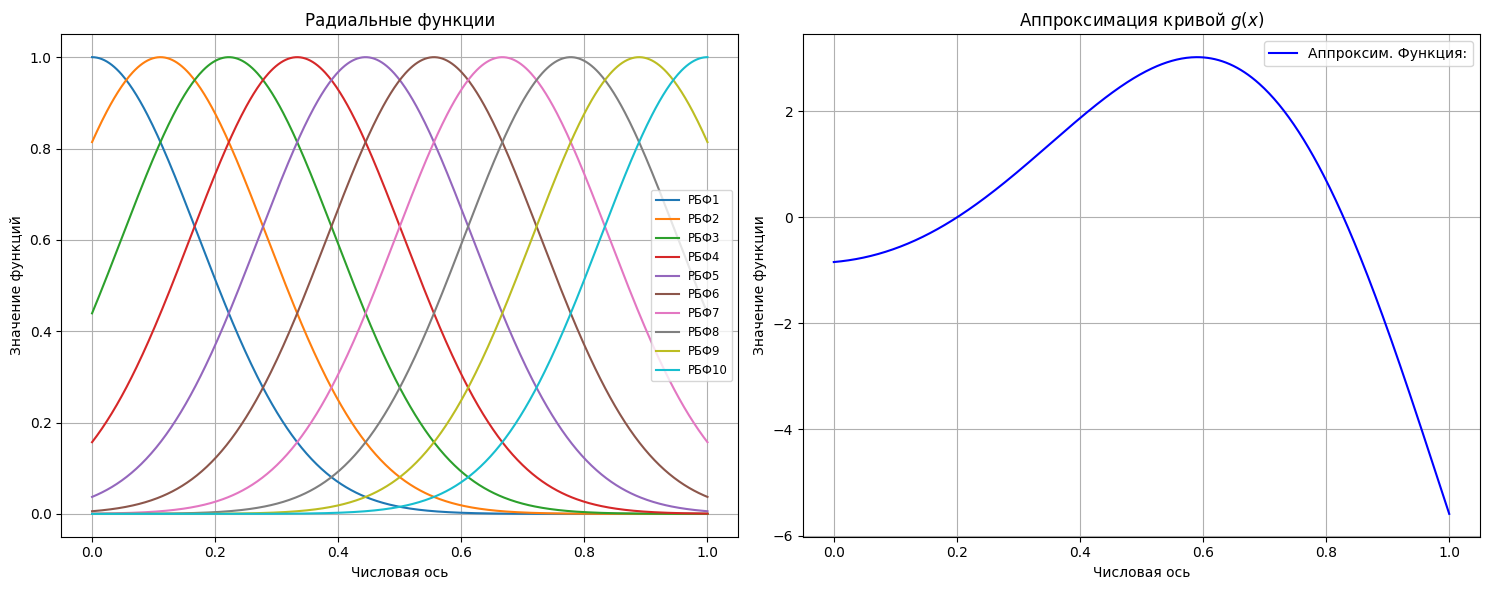

In [85]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(X_plot, F_plot[:, i], label=f'РБФ{i+1}')

plt.title("Радиальные функции")
plt.xlabel("Числовая ось")
plt.ylabel("Значение функций")
plt.legend(loc='right', fontsize='small')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(X_plot, g_plot, label='Аппроксим. Функция:', color='blue')

plt.title("Аппроксимация кривой $g(x)$")
plt.xlabel("Числовая ось")
plt.ylabel("Значение функции")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

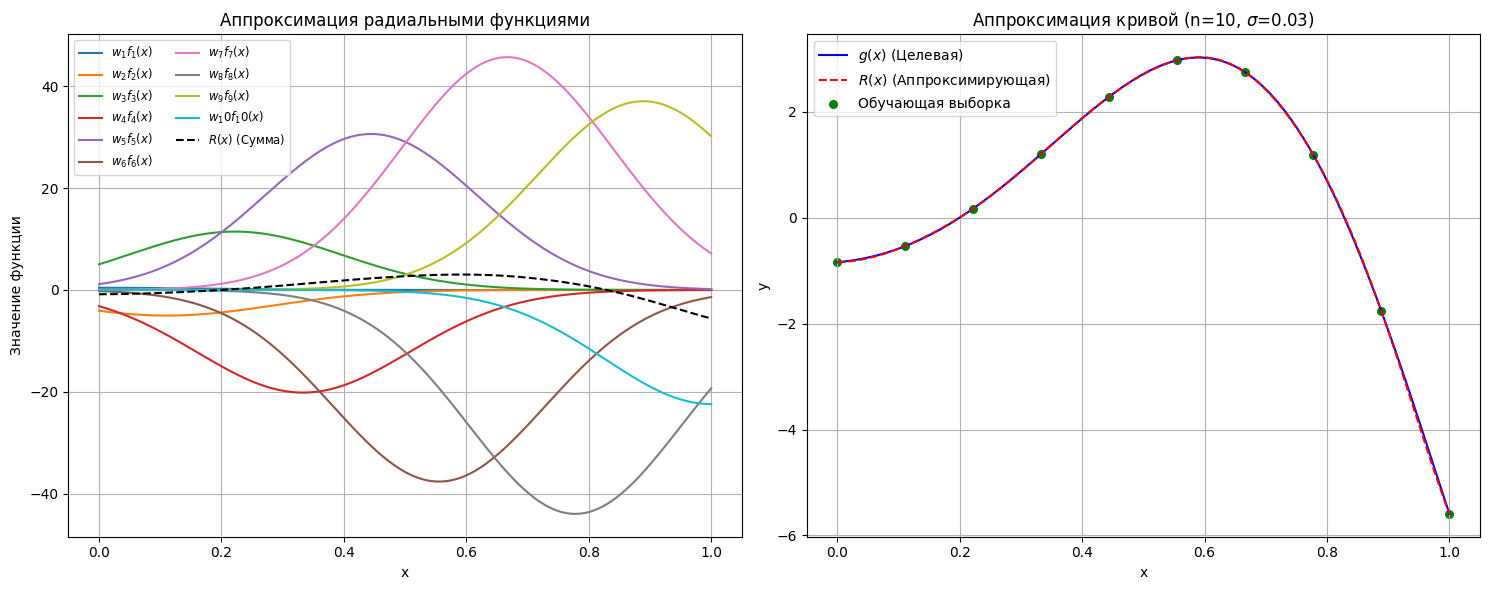

In [78]:
def plot_rbf_approximation(X_plot, g_plot, R_plot, X_train, d_train, W_plot_np, n, sigma):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    for i in range(n):
        plt.plot(X_plot, W_plot_np[:, i], label=f'$w_{i+1}f_{i+1}(x)$')
    plt.plot(X_plot, R_plot, label='$R(x)$ (Сумма)', color='black', linestyle='--')

    plt.title("Аппроксимация радиальными функциями")
    plt.xlabel("x")
    plt.ylabel("Значение функции")
    plt.legend(loc='upper left', ncol=2, fontsize='small')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(X_plot, g_plot, label='$g(x)$ (Целевая)', color='blue')
    plt.plot(X_plot, R_plot, label='$R(x)$ (Аппроксимирующая)', color='red', linestyle='--')
    plt.scatter(X_train, d_train, label='Обучающая выборка', color='green', marker='o', s=30)

    plt.title(f"Аппроксимация кривой (n={n}, $\\sigma$={sigma})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_rbf_approximation(X_plot, g_plot, R_plot, X_train, d_train, W_plot, n, sigma)


In [80]:
mse = np.mean((g_plot - R_plot)**2)
print(f"\nСреднеквадратическое отклонение (MSE): {mse:.4e}")


Среднеквадратическое отклонение (MSE): 4.0956e-04
